Installations

In [25]:
%pip install matplotlib pandas openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Imports

In [26]:
import subprocess
import os
import sys
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

Preparing folder

In [27]:
examples_folder_path = '../examplesGenerator/'
results_folder_path = f"{examples_folder_path}results/"
subprocess.run(f"mkdir {results_folder_path}", shell=True, stderr=subprocess.DEVNULL)
subprocess.run(f"rm {results_folder_path}*", shell=True)
subprocess.run(f"cd {examples_folder_path} && python3 examplesGenerator.py 2", shell=True, check=True)


############################################################
COMPILING 1 production_rules/production_rule_6.txt scalar
Done!
############################################################

############################################################
COMPILING 3 production_rules/production_rule_6.txt scalar
Done!
############################################################

############################################################
COMPILING 5 production_rules/production_rule_6.txt scalar
Done!
############################################################

############################################################
COMPILING 7 production_rules/production_rule_6.txt scalar
Done!
############################################################

############################################################
COMPILING 9 production_rules/production_rule_6.txt scalar
Done!
############################################################

############################################################
COM

KeyboardInterrupt: 

Done!
############################################################

############################################################
COMPILING 7 production_rules/production_rule_9.txt scalar
Done!
############################################################

############################################################
COMPILING 9 production_rules/production_rule_9.txt scalar
Done!
############################################################

############################################################
COMPILING 11 production_rules/production_rule_9.txt scalar
Done!
############################################################

############################################################
COMPILING 12 production_rules/production_rule_9.txt scalar
Done!
############################################################

############################################################
COMPILING 1 production_rules/production_rule_10.txt scalar
Done!
########################################################

Gathering data

In [ ]:
def get_program_size(file) -> int:
    size_result : subprocess.CompletedProcess = subprocess.run(f"size output.o", shell=True, capture_output=True, text=True)
    if size_result.returncode != 0:
        print(f"Error in {file}")
        sys.exit(1)
    size_str = size_result.stdout.split('\n')[1].split('\t')
    return int(size_str[0])

def get_program_cpu_cycles() -> int:
    subprocess.run(f"perf stat -o temp.txt -e cycles ./output.o 0 10", shell=True, check=True)
    with open('temp.txt', 'r') as f:
        lines = f.readlines()
        lines = [line for line in lines if line.strip() != '']
        words = lines[2].strip().split(' ')
        cycles = int(words[0].replace('.', ''))
    return cycles

In [ ]:
recursive_calls = []
iterations = []
sizes = []
cpu_cycles = []
for file in os.listdir(results_folder_path):
    info_array = file.split('_')
    it = int(info_array[1])
    production_rule = int(info_array[2])
    recursive_calls.append(production_rule)
    iterations.append(it)
    subprocess.run(f"clang -o output.o {results_folder_path+file}", shell=True)
    sizes.append(get_program_size(file))
    cpu_cycles.append(get_program_cpu_cycles())
subprocess.run(f"rm output.o temp.txt", shell=True)

CompletedProcess(args='rm output.o temp.txt', returncode=0)

Building tables

In [ ]:

df = pd.DataFrame({'Recursive Calls': recursive_calls, 'Iterations': iterations, 'Size (bytes)': sizes, 'CPU Cycles': cpu_cycles})
df.sort_values(by=['Recursive Calls', 'Iterations'], inplace=True)

sizes_table = df.pivot(index='Iterations', columns='Recursive Calls', values='Size (bytes)')
sizes_table.reset_index(inplace=True)
sizes_table.columns.name = None

cpu_cycles_table = df.pivot(index='Iterations', columns='Recursive Calls', values='CPU Cycles')
cpu_cycles_table.reset_index(inplace=True)
cpu_cycles_table.columns.name = None

subprocess.run(f"mkdir results", shell=True, stderr=subprocess.DEVNULL)
df.to_csv('results/main_table.csv', index=False)
sizes_table.to_csv('results/sizes_table.csv', index=False)
cpu_cycles_table.to_csv('results/cpu_cycles_table.csv', index=False)


with pd.ExcelWriter('results/tables.xlsx') as writer:
    df.to_excel(writer, sheet_name='Main Table', index=False)
    sizes_table.to_excel(writer, sheet_name='Sizes Table', index=False)
    cpu_cycles_table.to_excel(writer, sheet_name='CPU Cycles Table', index=False)

Building graphs

In [ ]:
file_name = 'results/graphs.pdf'
subprocess.run(f"rm {file_name}", shell=True)
pdf_file = PdfPages(file_name)

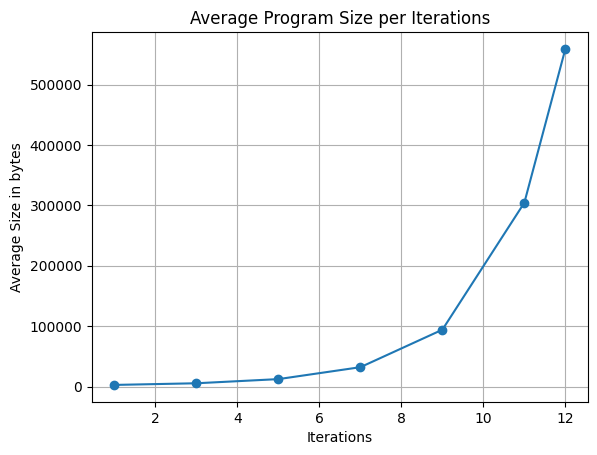

In [ ]:
size_per_iteration = df.groupby('Iterations')['Size (bytes)'].mean().reset_index()
plt.figure()
plt.plot(size_per_iteration['Iterations'], size_per_iteration['Size (bytes)'], marker='o')
plt.title('Average Program Size per Iterations')
plt.xlabel('Iterations')
plt.ylabel('Average Size in bytes')
plt.grid(True)
pdf_file.savefig()
plt.show()
plt.close()

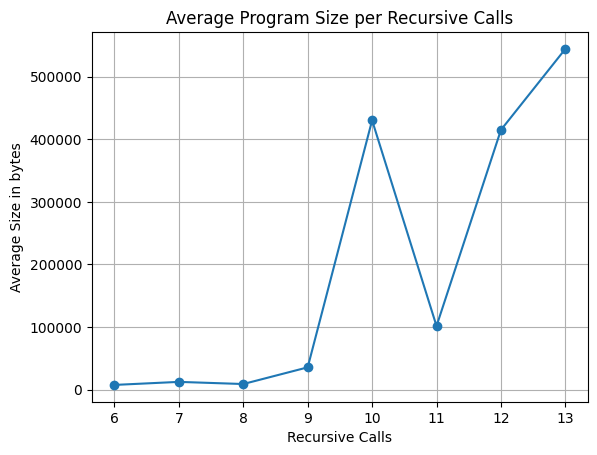

In [ ]:
avg_size_per_recursive_calls = df.groupby('Recursive Calls')['Size (bytes)'].mean().reset_index()
plt.figure()
plt.plot(avg_size_per_recursive_calls['Recursive Calls'], avg_size_per_recursive_calls['Size (bytes)'], marker='o')
plt.title('Average Program Size per Recursive Calls')
plt.xlabel('Recursive Calls')
plt.ylabel('Average Size in bytes')
plt.grid(True)
pdf_file.savefig()
plt.show()
plt.close()

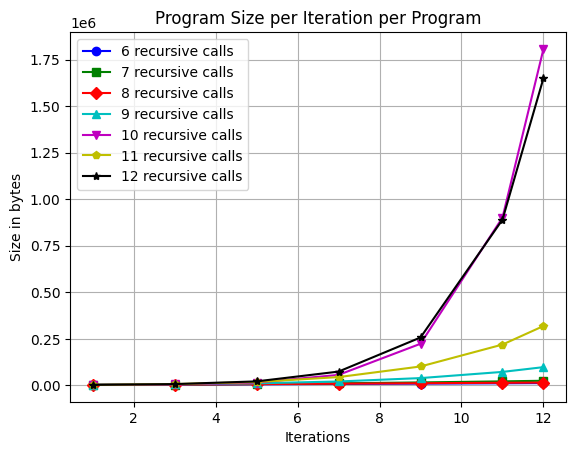

Done!
############################################################

############################################################
COMPILING 12 production_rules/production_rule_11.txt scalar
Done!
############################################################

############################################################
COMPILING 1 production_rules/production_rule_12.txt scalar
Done!
############################################################

############################################################
COMPILING 3 production_rules/production_rule_12.txt scalar
Done!
############################################################

############################################################
COMPILING 5 production_rules/production_rule_12.txt scalar
Done!
############################################################

############################################################
COMPILING 7 production_rules/production_rule_12.txt scalar
Done!
#####################################################

In [29]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'X', ".", "1", "2"]

# Remove 13 from Recursive Calls
df = df[df['Recursive Calls'] != 13]

plt.figure()
for i, program in enumerate(df['Recursive Calls'].unique()):
    subset = df[df['Recursive Calls'] == program]
    plt.plot(subset['Iterations'], subset['Size (bytes)'],
             marker=markers[i%len(markers)], color=colors[i%len(colors)], label=f'{program} recursive calls')

plt.title('Program Size per Iteration per Program')
plt.xlabel('Iterations')
plt.ylabel('Size in bytes')
plt.grid(True)
plt.legend()
pdf_file.savefig()
plt.show()
plt.close()

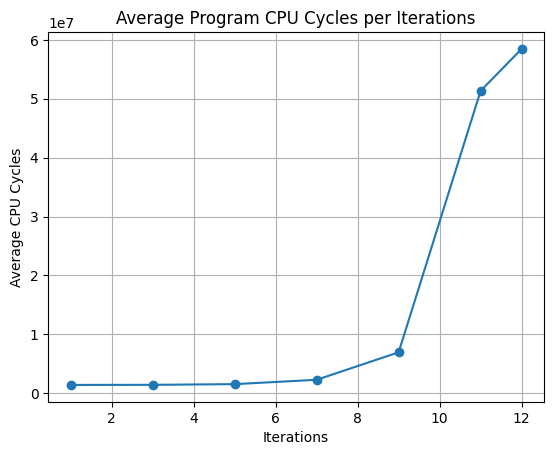

In [20]:
size_per_iteration = df.groupby('Iterations')['CPU Cycles'].mean().reset_index()
plt.figure()
plt.plot(size_per_iteration['Iterations'], size_per_iteration['CPU Cycles'], marker='o')
plt.title('Average Program CPU Cycles per Iterations')
plt.xlabel('Iterations')
plt.ylabel('Average CPU Cycles')
plt.grid(True)
pdf_file.savefig()
plt.show()
plt.close()

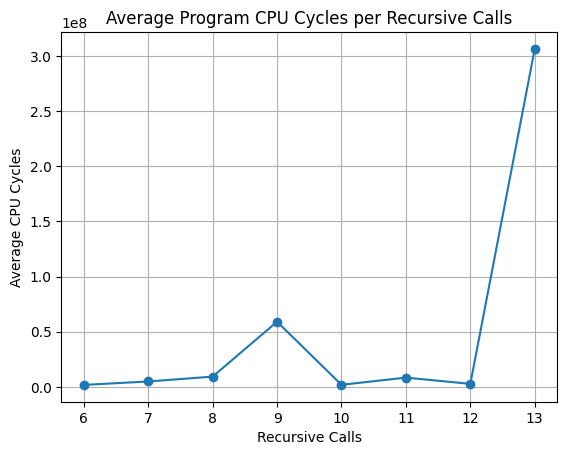

In [21]:
avg_size_per_recursive_calls = df.groupby('Recursive Calls')['CPU Cycles'].mean().reset_index()
plt.figure()
plt.plot(avg_size_per_recursive_calls['Recursive Calls'], avg_size_per_recursive_calls['CPU Cycles'], marker='o')
plt.title('Average Program CPU Cycles per Recursive Calls')
plt.xlabel('Recursive Calls')
plt.ylabel('Average CPU Cycles')
plt.grid(True)
pdf_file.savefig()
plt.show()
plt.close()

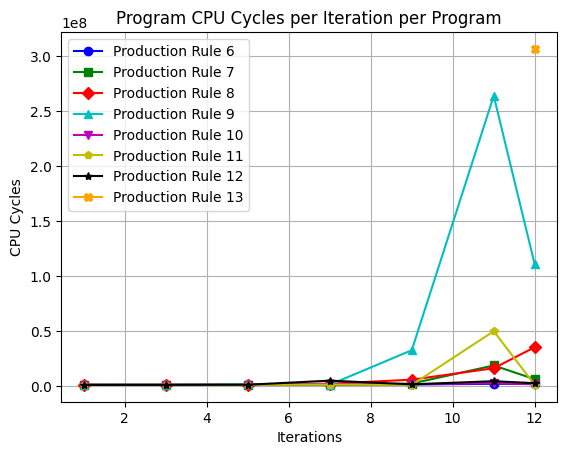

In [22]:
plt.figure()
for i, program in enumerate(df['Recursive Calls'].unique()):
    subset = df[df['Recursive Calls'] == program]
    plt.plot(subset['Iterations'], subset['CPU Cycles'],
                marker=markers[i%len(markers)], color=colors[i%len(colors)], label=f'Production Rule {program}')

plt.title('Program CPU Cycles per Iteration per Program')
plt.xlabel('Iterations')
plt.ylabel('CPU Cycles')
plt.grid(True)
plt.legend()
pdf_file.savefig()
plt.show()
plt.close()

In [23]:
pdf_file.close()